# Initial tests for Vlasov

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline

# Set style of plots
ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
# mpl.interactive(True)


mpl.rcParams.update({'axes.formatter.useoffset':False})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 


PI = np.pi
sqrtPI = np.sqrt(PI)
sqrt2PI = np.sqrt(2*PI)

In [2]:
def dip_coeff_octu(a,theta,n):
    return sqrtPI/(2*(0.5+1j*a*theta*n)**1.5)

def dip_coeff_octu2(lam):
    return sqrt2PI/((1+2j*lam)**1.5)

def dip_coeff_octu3(lam,n):
    return np.sqrt(2*lam/n**3)*np.exp(-lam/n)

/home/sfuruset/miniconda3/lib/python3.5/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


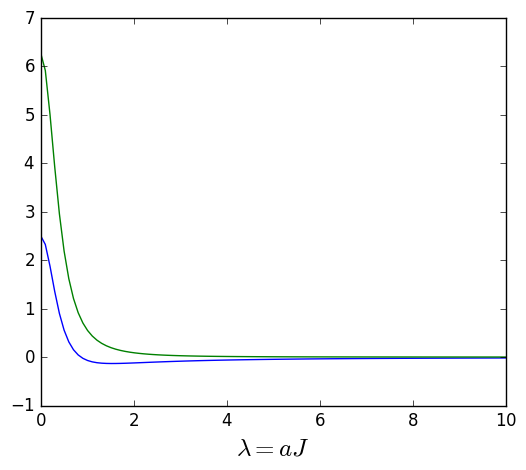

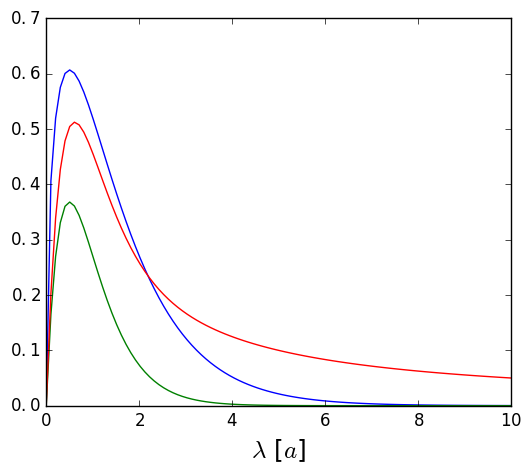

In [3]:
# plt.figure(1)
# a=1e-2
# theta=np.linspace(0,1,20)
# for n in range(0,1000,100):
#     plt.plot(theta,np.real(dip_coeff_octu(a,theta,n)),label=n)
# plt.legend(loc=0)

plt.figure(2)
lam = np.linspace(0,10,100)
coeff = dip_coeff_octu2(lam)
plt.plot(lam,coeff)
plt.plot(lam,np.conj(coeff)*coeff)
plt.xlabel(r'$\lambda=aJ$')

plt.figure(3)
lam = np.linspace(0,10,100)
coeff = dip_coeff_octu3(lam,1)
plt.plot(lam,coeff)
plt.plot(lam,np.conj(coeff)*coeff)
spec = np.zeros_like(coeff)
ns = np.arange(1,1000,1)
for i,l in enumerate(lam):
    c = dip_coeff_octu3(l,ns)
    spec[i]=np.vdot(c,c)
plt.plot(lam,spec)

plt.xlabel(r'$\lambda$ [$a$]')

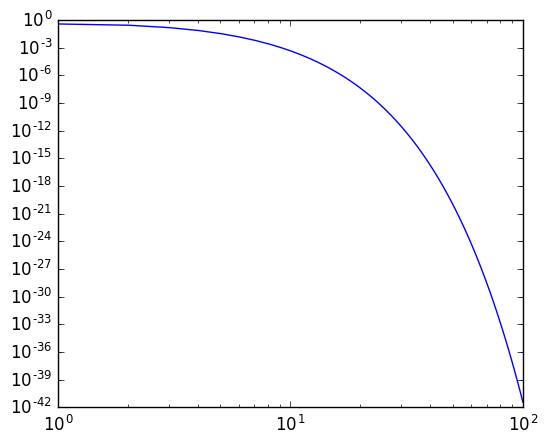

In [4]:
plt.figure()
x = np.linspace(0,100,100)
plt.loglog(x,x*np.exp(-x))
